## Create a file named 4.9_seaborn_exercises.py for this exercise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set(style="darkgrid")

from env import user, host, password

### Use the iris database to answer the following quesitons:

- What does the distribution of petal lengths look like?
- Is there a correlation between petal length and petal width?
- Would it be reasonable to predict species based on sepal width and sepal length?
- Which features would be best used to predict species?

In [2]:
def get_connection(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

iris = sns.load_dataset('iris')

In [3]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


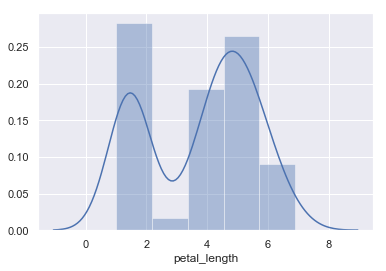

In [4]:
sns.distplot(iris.petal_length);

In [5]:
def get_connection(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

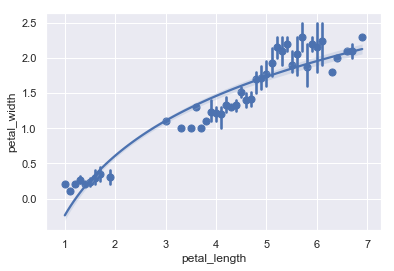

In [6]:
sns.regplot(data=iris, x='petal_length', y='petal_width', x_estimator=np.mean, logx=True, truncate=True)

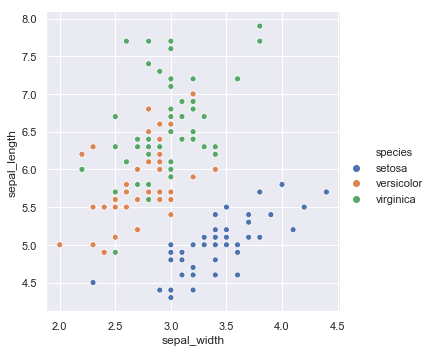

In [7]:
sns.relplot(x="sepal_width", y="sepal_length", hue="species", data=iris, ci="sd");

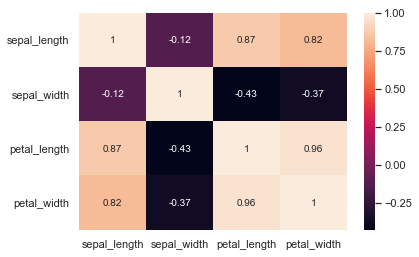

In [8]:
sns.heatmap(iris.corr(), annot=True)

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

- Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [9]:
from pydataset import data
anscombe = sns.load_dataset('anscombe')

In [10]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

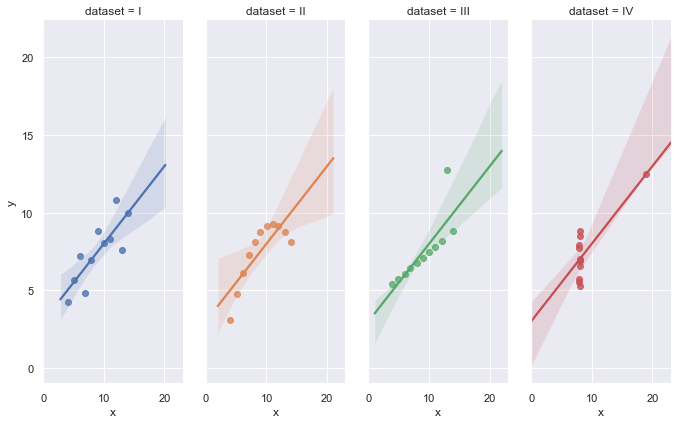

In [11]:
sns.lmplot(data=anscombe, x='x', y='y', hue='dataset', col='dataset', height=6, aspect=.4, x_jitter=.1)

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [12]:
InsectSprays = data('InsectSprays')

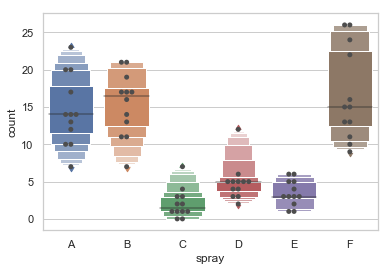

In [13]:
sns.set(style='whitegrid')
product_ranking = ['A', 'B', 'C', 'D', 'E', 'F']
sns.swarmplot(y="count", x="spray", data=InsectSprays, size=5, color='.3')
sns.boxenplot(y="count", x="spray", data=InsectSprays, order=product_ranking, scale='linear')

### 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

- Create a column named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [14]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [15]:
swiss['is_catholic'] = swiss.Catholic > 50

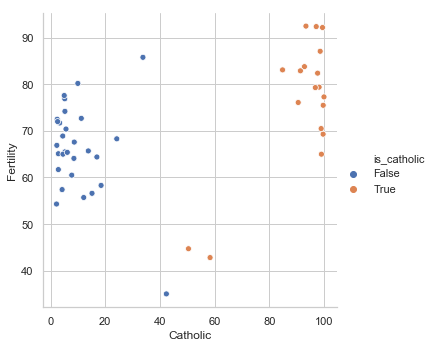

In [16]:
sns.relplot(data=swiss, x='Catholic', y='Fertility',hue='is_catholic')

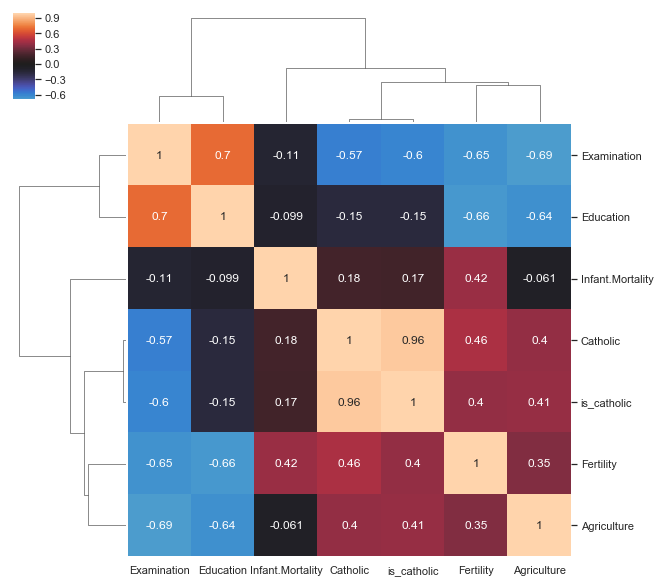

In [17]:
corr = swiss.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.clustermap(swiss.corr(), annot=True, center=0)

### 4. Using the chipotle dataset from the previous exercise, create a barplot that shows the 4 most popular items and the revenue produced by each.

In [18]:
conn = get_connection('chipotle', user, host, password)
orders = pd.read_sql('SELECT * FROM orders', conn)

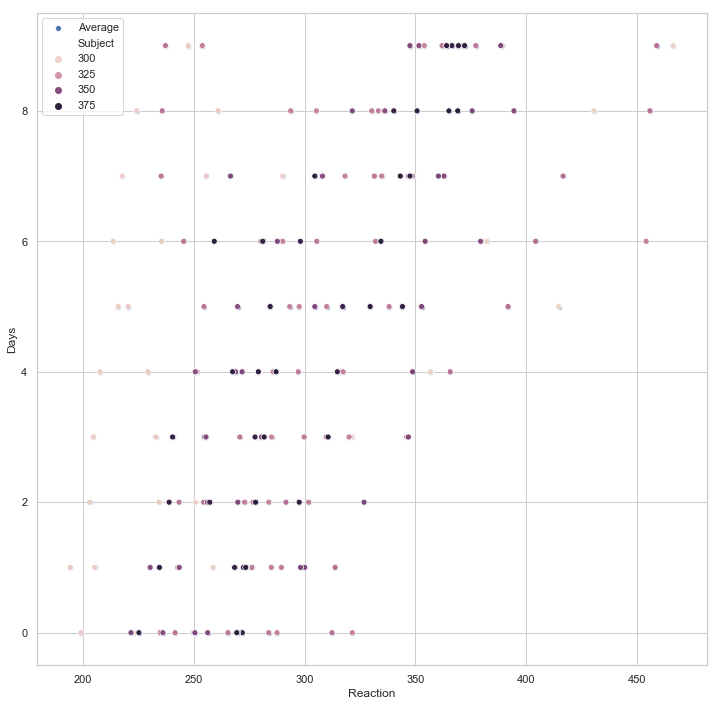

In [22]:
plt.figure(figsize=(12, 12))

sleepstudy = data('sleepstudy') 
sns.scatterplot(x="Reaction", y="Days", label="Average", data=sleepstudy)
sns.scatterplot(x="Reaction", y="Days", hue="Subject", data=sleepstudy)

In [20]:
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308
10,466.3535,9,308
